# Proyecto 1 - Patrik Franco Pereda Matute

Para estos proyecto, utilizaremos `Pandas` y `Matplotlib` para visualizar los datos de ventas de coches.

Utilizaremos el siguiente conjunto de datos: https://github.com/Data-Market/vehiculos-de-segunda-mano/

### 1️⃣ Gráfico de Columnas - Cantidad de Coches por Rango de Precios.

📌 ¿Qué representa?

Muestra cuántos coches hay en cada rango de precio. Nos ayuda a ver si la mayoría de los coches son baratos o caros.

🧐 Explicación

Imagina que estamos en un concesionario y queremos saber si hay más coches baratos o caros. Agrupamos los coches en rangos de precio (0-5000€, 5000-10000€, etc.) y contamos cuántos hay en cada grupo.

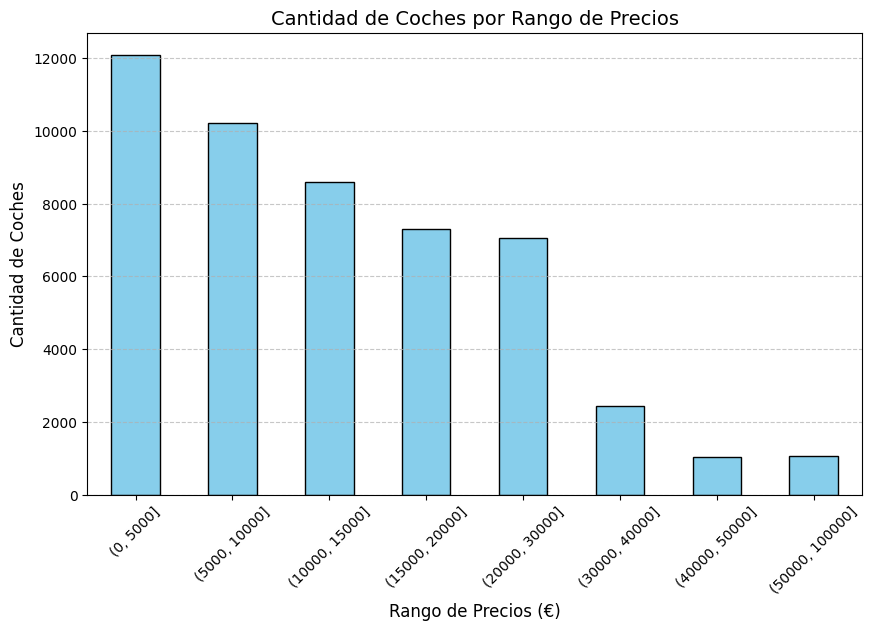

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("../data/coches-de-segunda-mano-sample.csv")  # Asegúrate de tener el archivo correcto

# Crear rangos de precios
bins = [0, 5000, 10000, 15000, 20000, 30000, 40000, 50000, 100000]
df["rango_precio"] = pd.cut(df["price"], bins)

# Contar coches por rango de precio
conteo_precios = df["rango_precio"].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10,6))
conteo_precios.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Cantidad de Coches por Rango de Precios", fontsize=14)
plt.xlabel("Rango de Precios (€)", fontsize=12)
plt.ylabel("Cantidad de Coches", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 2️⃣ Gráfico de Líneas - Evolución de Publicaciones de Coches en el Tiempo

📌 ¿Qué representa?

Muestra cuántos coches se publicaron a la venta en cada mes. Nos ayuda a ver si hay temporadas con más coches en venta.

🧐 Explicación

Imagina que queremos ver si hay más coches a la venta en verano o en invierno. Contamos cuántos coches se publicaron cada mes y lo mostramos en una línea.

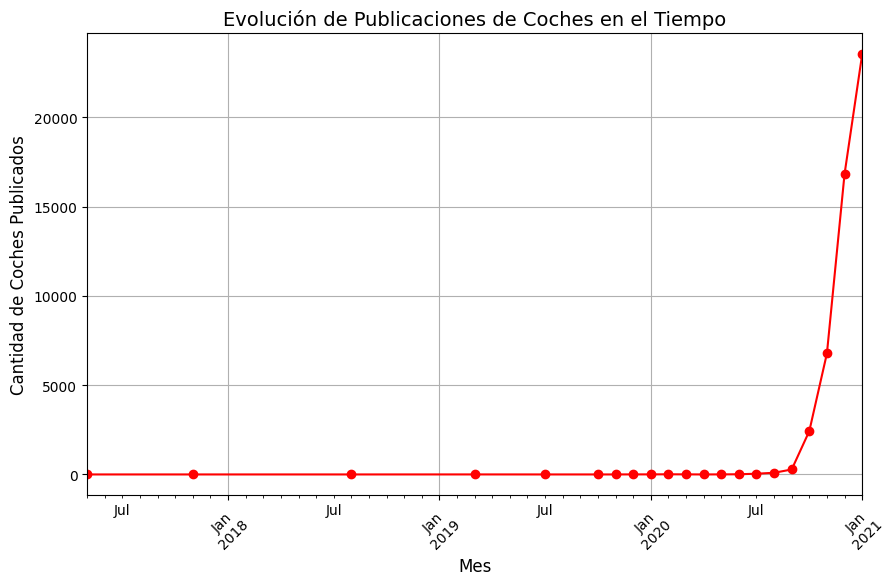

In [5]:
df["publish_date"] = pd.to_datetime(df["publish_date"])  # Convertir a formato fecha
df["mes"] = df["publish_date"].dt.to_period("M")  # Extraer mes y año

# Contar coches por mes
publicaciones_por_mes = df["mes"].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10,6))
publicaciones_por_mes.plot(kind="line", marker="o", color="red", linestyle="-")
plt.title("Evolución de Publicaciones de Coches en el Tiempo", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Cantidad de Coches Publicados", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### 3️⃣ Gráfico Circular - Tipos de Combustible en los Coches en Venta

📌 ¿Qué representa?

Muestra qué porcentaje de los coches usan diésel, gasolina, eléctrico, etc.

🧐 Explicación

Imagina que queremos saber qué tipo de combustible es más común en los coches de segunda mano. Contamos cuántos coches hay de cada tipo y lo mostramos con un gráfico de barras.

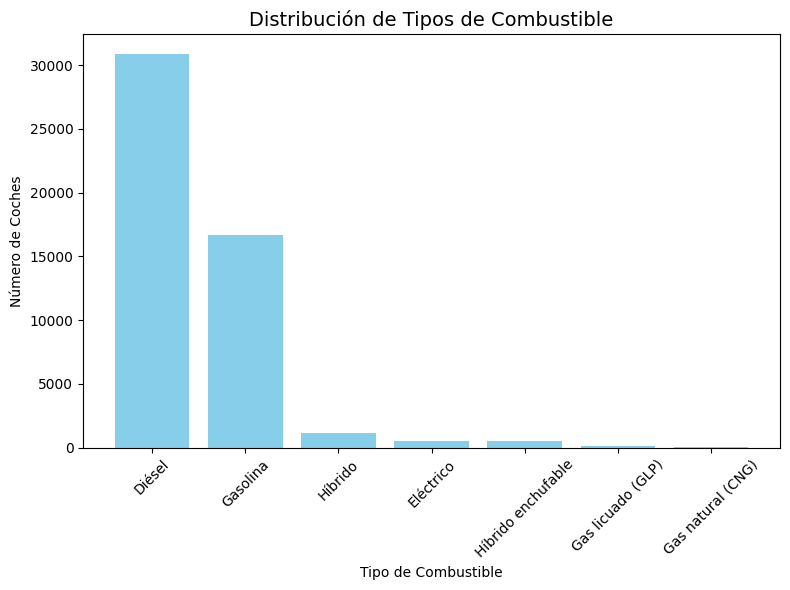

In [3]:
# Contar coches por tipo de combustible
combustible_counts = df["fuel"].value_counts()

# Graficar
plt.figure(figsize=(8,6))
plt.bar(combustible_counts.index, combustible_counts.values, color='skyblue')
plt.title("Distribución de Tipos de Combustible", fontsize=14)
plt.xlabel("Tipo de Combustible")
plt.ylabel("Número de Coches")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4️⃣ Gráfico de Barras - Cantidad de Coches por Provincia

📌 ¿Qué representa?

Muestra en qué provincias hay más coches a la venta.

🧐 Explicación

Si queremos comprar un coche, nos interesa saber en qué provincias hay más opciones. Este gráfico nos dice cuántos coches hay en cada provincia.

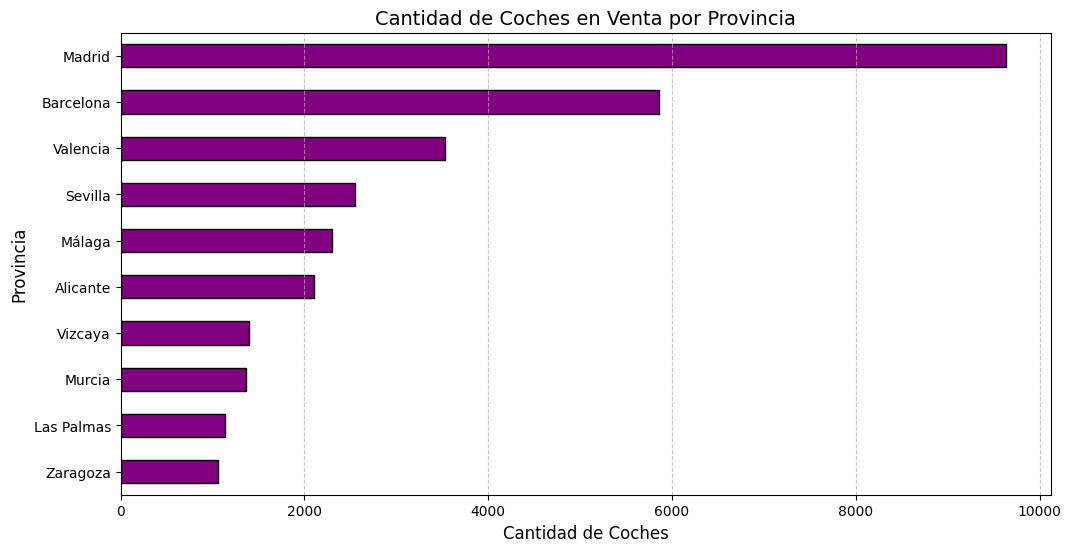

In [7]:
# Contar coches por provincia
provincias_counts = df["province"].value_counts().head(10)  # Top 10 provincias

# Graficar
plt.figure(figsize=(12,6))
provincias_counts.plot(kind="barh", color="purple", edgecolor="black")
plt.title("Cantidad de Coches en Venta por Provincia", fontsize=14)
plt.xlabel("Cantidad de Coches", fontsize=12)
plt.ylabel("Provincia", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

### 5️⃣ Gráfico de Áreas - Evolución del Precio Medio de los Coches en el Tiempo

📌 ¿Qué representa?

Muestra cómo ha cambiado el precio medio de los coches mes a mes.

🧐 Explicación

Si el precio medio de los coches sube o baja con el tiempo, este gráfico nos lo dice.


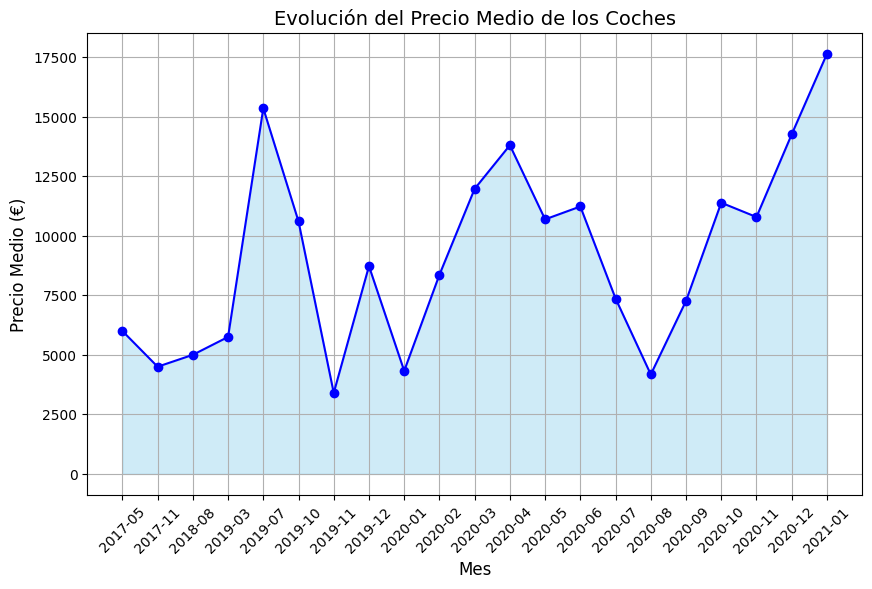

In [8]:
# Calcular precio medio por mes
precio_medio_por_mes = df.groupby(df["mes"])["price"].mean()

# Graficar
plt.figure(figsize=(10,6))
plt.fill_between(precio_medio_por_mes.index.astype(str), precio_medio_por_mes, color="skyblue", alpha=0.4)
plt.plot(precio_medio_por_mes.index.astype(str), precio_medio_por_mes, color="blue", marker="o")
plt.title("Evolución del Precio Medio de los Coches", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Precio Medio (€)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 6️⃣ Gráfico de Puntos - Relación entre Kilómetros y Precio

📌 ¿Qué representa?

Nos muestra si los coches con más kilómetros son más baratos o no.

🧐 Explicación

Si queremos ver si los coches con muchos kilómetros son más baratos, este gráfico nos ayuda.

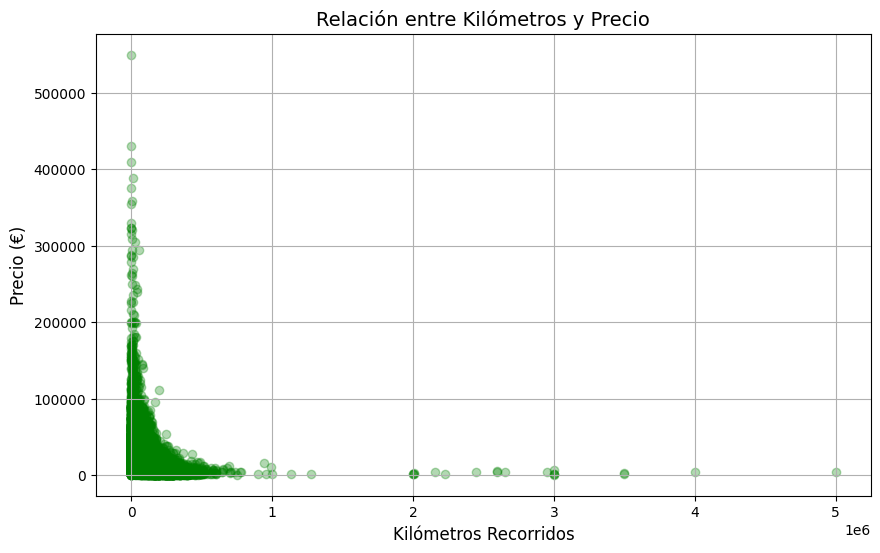

In [9]:
# Graficar
plt.figure(figsize=(10,6))
plt.scatter(df["kms"], df["price"], alpha=0.3, color="green")
plt.title("Relación entre Kilómetros y Precio", fontsize=14)
plt.xlabel("Kilómetros Recorridos", fontsize=12)
plt.ylabel("Precio (€)", fontsize=12)
plt.grid(True)
plt.show()

### 7️⃣ Gráfico de Combinación - Precio Medio por Año del Coche y Cantidad de Coches

📌 ¿Qué representa?

Nos dice cuántos coches hay por año de fabricación y cuál es su precio medio.

🧐 Explicación

Si queremos saber si los coches más viejos son más baratos, este gráfico lo muestra combinando columnas y líneas.

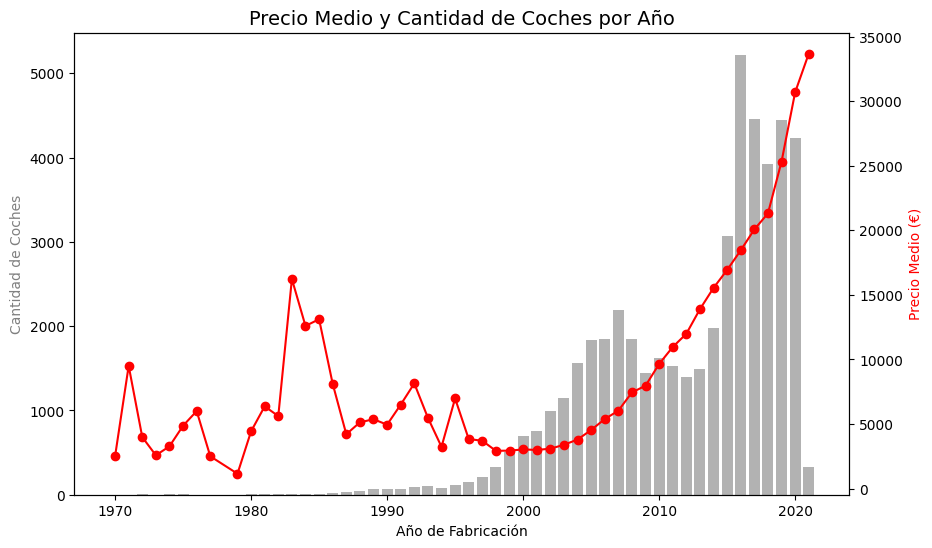

In [10]:
# Agrupar por año de fabricación
df_year = df.groupby("year").agg({"price": "mean", "url": "count"})  # Precio medio y cantidad de coches

# Graficar
fig, ax1 = plt.subplots(figsize=(10,6))

# Barras (cantidad de coches)
ax1.bar(df_year.index, df_year["url"], color="gray", alpha=0.6, label="Cantidad de Coches")
ax1.set_xlabel("Año de Fabricación")
ax1.set_ylabel("Cantidad de Coches", color="gray")

# Línea (precio medio)
ax2 = ax1.twinx()
ax2.plot(df_year.index, df_year["price"], color="red", marker="o", label="Precio Medio (€)")
ax2.set_ylabel("Precio Medio (€)", color="red")

plt.title("Precio Medio y Cantidad de Coches por Año", fontsize=14)
plt.show()

### 8️⃣ Gráfico de Histogramas - Distribución de Kilómetros Recorridos por los Coches en Venta

📌 ¿Qué representa?

Muestra cuántos coches hay según el número de kilómetros recorridos.

🧐 Explicación

Imagina que queremos saber si los coches en venta tienen pocos o muchos kilómetros. Un histograma nos agrupa los coches en intervalos de kilómetros y nos dice cuántos hay en cada grupo.

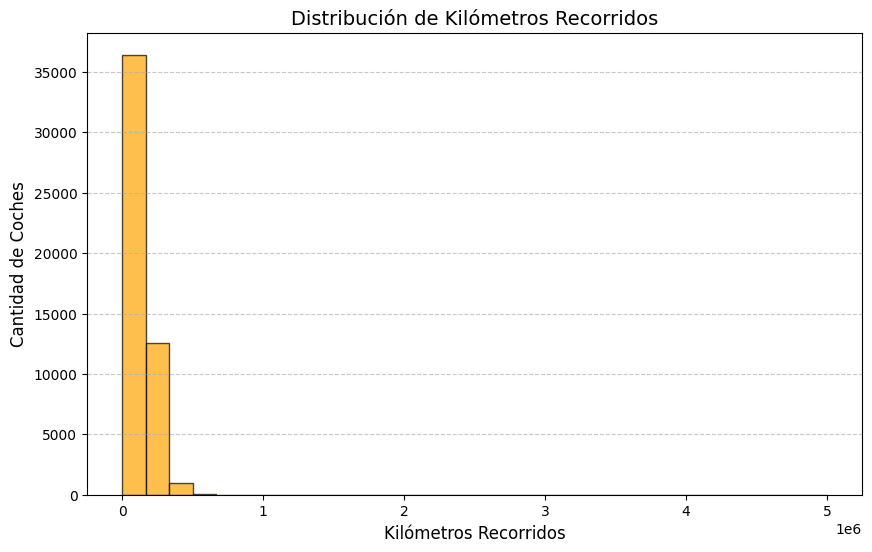

In [11]:
# Graficar histograma de kilómetros
plt.figure(figsize=(10,6))
plt.hist(df["kms"], bins=30, color="orange", edgecolor="black", alpha=0.7)
plt.title("Distribución de Kilómetros Recorridos", fontsize=14)
plt.xlabel("Kilómetros Recorridos", fontsize=12)
plt.ylabel("Cantidad de Coches", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 9️⃣ Gráfico de Boxplot - Comparación de Precios según Tipo de Combustible

📌 ¿Qué representa?

Nos permite ver cómo varían los precios de los coches según su tipo de combustible.

🧐 Explicación

Si queremos saber si los coches eléctricos son más caros que los de gasolina o diésel, este gráfico nos lo muestra. Los boxplots (gráficos de caja y bigotes) nos indican los precios mínimos, máximos y los valores más comunes de cada tipo de combustible.

/tmp/ipykernel_1325/994912458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["fuel"], y=df["price"], palette="Set2")


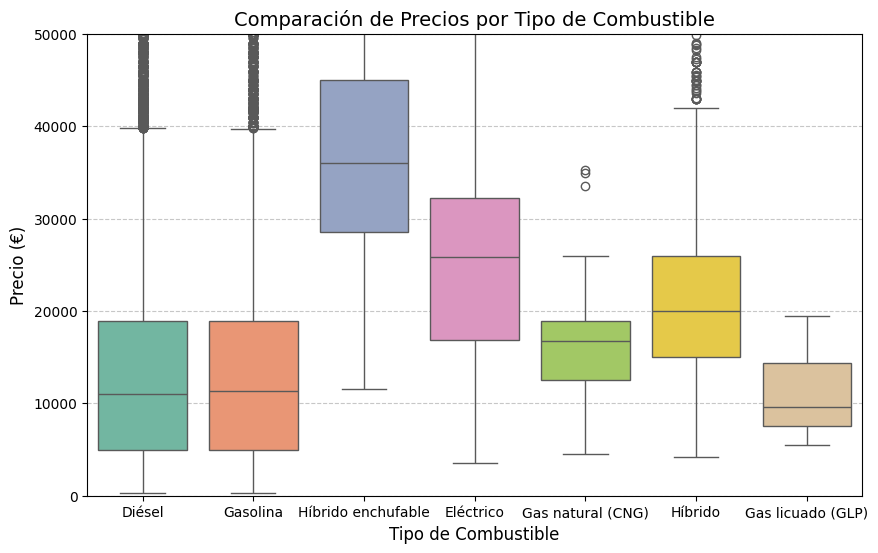

In [12]:
import seaborn as sns

# Graficar boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=df["fuel"], y=df["price"], palette="Set2")
plt.ylim(0, 50000)  # Limitar el rango para evitar valores extremos
plt.title("Comparación de Precios por Tipo de Combustible", fontsize=14)
plt.xlabel("Tipo de Combustible", fontsize=12)
plt.ylabel("Precio (€)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 🔟 Gráfico de Mapa de Calor - Relación entre Año de Fabricación y Potencia de los Coches

📌 ¿Qué representa?

Muestra cómo la potencia de los coches ha cambiado según el año de fabricación.

🧐 Explicación

Si queremos ver si los coches más modernos tienen más potencia que los antiguos, un mapa de calor nos ayuda. Aquí, los colores indican la cantidad de coches con determinada potencia en cada año.

/tmp/ipykernel_533/2441398012.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio["power_range"] = pd.cut(df_limpio["power"], bins=bins, labels=labels, include_lowest=True)
/tmp/ipykernel_533/2441398012.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_limpio.pivot_table(index="power_range", columns="year", aggfunc="size", fill_value=0)


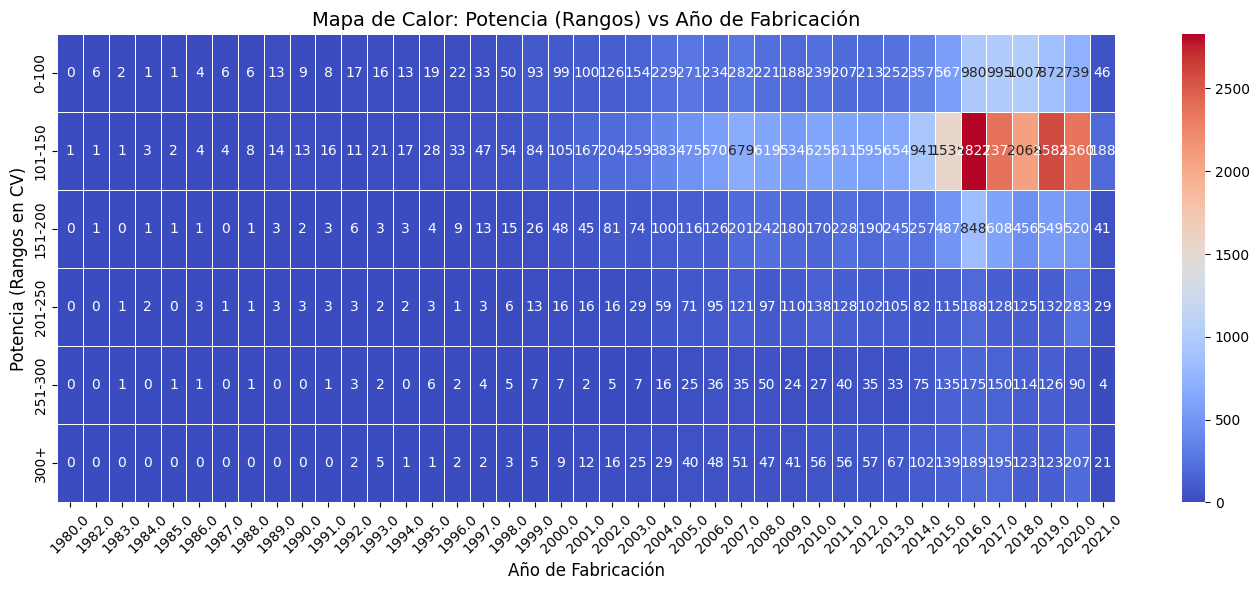

In [6]:
import seaborn as sns

# Limpiar datos: eliminar filas sin 'year' o 'power'
df_limpio = df.dropna(subset=["year", "power"])

# Agrupar potencia en rangos
bins = [0, 100, 150, 200, 250, 300, 1000]
labels = ["0-100", "101-150", "151-200", "201-250", "251-300", "300+"]
df_limpio["power_range"] = pd.cut(df_limpio["power"], bins=bins, labels=labels, include_lowest=True)

# Crear tabla de frecuencias: potencia agrupada vs año
heatmap_data = df_limpio.pivot_table(index="power_range", columns="year", aggfunc="size", fill_value=0)

# Ordenar años de forma ascendente
heatmap_data = heatmap_data.sort_index(axis=1)

# Graficar
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt="d")

plt.title("Mapa de Calor: Potencia (Rangos) vs Año de Fabricación", fontsize=14)
plt.xlabel("Año de Fabricación", fontsize=12)
plt.ylabel("Potencia (Rangos en CV)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()